In [1]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator, Aer
from qiskit.providers.fake_provider import FakeProvider, FakeManila, FakeToronto, FakeJakartaV2
from qiskit_aer.noise import NoiseModel
import qiskit.quantum_info as qi

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.continuous import QContinuousRC
from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC
from src.data import DataSource

# Continuous / Online Reservoir

One continuous circuit for all time steps. At every step, the input x(t) is fed into the circuit and some features f(t) are extracted through partially measuring the circuit.
After all episodes, the features f(t) are fed into a linear regression model to predict the output y(t).

In practice it doesn't work well, probably because the mid-circuit measurements disturb the states too much while not giving enough information.
Most papers argue they can ignore the backaction of the measurements in simulations, because on can do so in NMR systems.

### Papers mentioning the measurement problem

Time-series quantum reservoir computing with weak and projective measurements <br>
'One repeats part of the experiment after each projective measurement while the other employs weak measurements operating online at the trade-off where information can be extracted accurately and without hindering the needed memory'

Optimizing a quantum reservoir computer for time series prediction <br>
'requires multiple copies of the same system in order to make the effect of measurement back-action irrelevant'

Optimizing Quantum Noise-induced Reservoir Computing for Nonlinear and Chaotic Time Series Prediction <br>
'Expectation values are measured for all n qubits individually at each time-step'

The Reservoir Learning Power across Quantum Many-Boby Localization Transition <br>
'we neglect the backaction effects in the measurements'

Dynamical phase transitions in quantum reservoir computing <br>
'disregard the measurement back-action, allowing the online mode computation'

Harnessing disordered ensemble quantum dynamics for machine learning <br>
'we do not consider the backaction of the measurements'

nrmse_train:    7.11e-02
nrmse_val:      6.82e-02
corr_train:     9.85e-01
corr_val:       9.85e-01


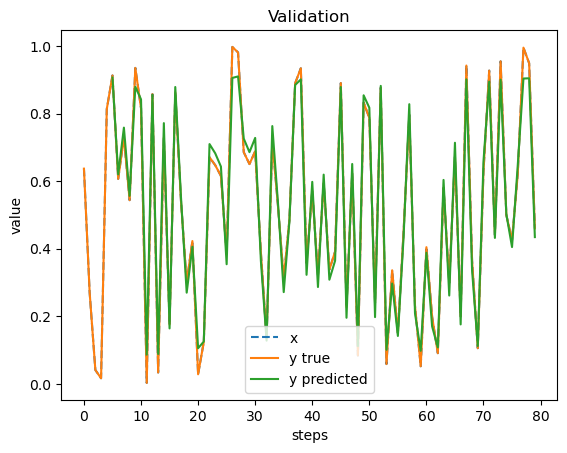

In [4]:
# First we show that the code for the method works
# and measuring the input qubit after the random unitary is enough to reproduce the input.
# The task here is to reprooduce the random input.

data = DataSource(xtype='random', ytype='same', xnorm='norm', ynorm='norm')

qrc = QContinuousRC(nmeas=1, nqubits=3, measaxes='z', qctype='ising', 
                        ftype=1, regression_model='regression', add_x_as_feature=False)

qrc.run(data)

qrc.print_results()

# qrc.plot_train(px=True, nepisodes=1)
qrc.plot_val(px=True, nepisodes=1)

nrmse_train:    5.84e-01
nrmse_val:      5.61e-01
corr_train:     1.42e-03
corr_val:       2.33e-03


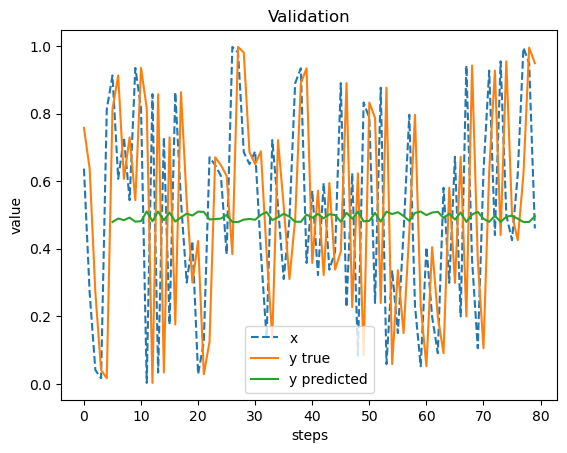

In [5]:
# though the continuous method struggles to 'memorize' or extract the input at x(t-1)

data = DataSource(xtype='random', ytype='stm', xnorm='norm', ynorm='norm', nepisodes=10, memory=1)

qrc = QContinuousRC(nmeas=2, nqubits=5, measaxes='z', qctype='ising', add_x_as_feature=False)

qrc.run(data)

qrc.print_results()

# print(qrc.dimf) # 119

# qrc.plot_train(px=True, nepisodes=1)
qrc.plot_val(px=True, nepisodes=1)

In [ ]:
# # also does not work
# # runtime 80min

# data = DataSource(xtype='binary', ytype='stm', nepisodes=10, memory=1)

# qrc = QContinuousRC(nmeas=3, nqubits=7, qctype='ising', mtype='weak',)
# qrc.run(data)

# qrc.print_results()
# qrc.plot_val(nepisodes=1)